# Feeding the DeepL model 

based on: 

https://keras.io/preprocessing/image/

https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

## Load Model

Imports and Data Preprocessing have to be executed, then the loaded model can be used for the Testing and Visualisation steps

In [1]:
# load modules 
import os
from keras.models import load_model

#specify directory
os.chdir(r'C:\Users\Anonym\Documents\GitHub\DLfM_BrandManagement\model')

Using TensorFlow backend.


In [2]:
#Load 4 models
num_attributes = 4
model = [[] for i in range(num_attributes)]
model[0] = load_model('savemodels/glamorous_model.h5')
model[1] = load_model('savemodels/rugged_model.h5')
model[2] = load_model('savemodels/fun_model.h5')
model[3] = load_model('savemodels/healthy_model.h5')

In [3]:
print(model[0].summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 204800)            23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 64)                13107264  
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 36,699,201
Trainable params: 13,111,489
Non-trainable params: 23,587,712
_________________________________

## Load Data

In [4]:
#specify directory
import os
os.chdir('C:\\Users\\Anonym\\Documents\\GitHub\\DLfM_BrandManagement')

In [5]:
import numpy as np
npimgs = np.load('data/instagram_images/margotrobbie_official_npimgs.npy')

In [6]:
npimgs.shape

(12, 300, 300, 3)

In [7]:
import matplotlib.pyplot as plt
print('First image: ')
plt.imshow(npimgs[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


First image: 


## Feed Model

Caution: model can only get model error/accuracy if it gets the error between predicted and true labels, and for test data we do not have true labels only predicted labels

In [8]:
X_test = npimgs

In [9]:
'''
 Take as input probability output of 3 classfiers coressponding to each class( We have 3 classes and
 one classfier corresponding to each class )
 Predict the class label which have the highest probability
 Return the class label corresponding to class which have highest probablity
'''
def give_ovr_class_label_output(y_pred):
    '''
    Stack 4 probabilities to get a numpy array
    '''
    yclass= np.hstack((y_pred[0], y_pred[1],y_pred[2],y_pred[3]))
       
    y_class = np.array( yclass )
    '''
    Get the index corresponding to the max value of column
    '''
    idx = np.argmax(y_class, axis=-1)
    y_class = np.zeros(y_class.shape )
    '''
    Convert the one hot position into class label
    '''
    y_class[ np.arange(y_class.shape[0]), idx] = 1
    y_train_pred = np.argmax(y_class, axis=1)
    return y_train_pred

In [10]:
# create an empty list

y_pred = [[] for i in range(num_attributes)]
num_attributes  = 4 

for i in range(num_attributes):
    y_pred[i] = model[i].predict(X_test)

y_pred_label = give_ovr_class_label_output(y_pred)


## Model Results

In [11]:
# encoded label 
y_pred_lst = y_pred_label.tolist()
print(y_pred_lst)
len(y_pred_lst)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


12

In [12]:
# map back to original label name 
code2label = {0: 'glamorous', 1: 'rugged',2: 'fun',3: 'healthy'}
y_pred_lbnm = map(code2label.get, y_pred_lst)
y_pred_lbnm = list(y_pred_lbnm)
print(y_pred_lbnm)

['glamorous', 'glamorous', 'glamorous', 'glamorous', 'glamorous', 'glamorous', 'glamorous', 'glamorous', 'glamorous', 'glamorous', 'glamorous', 'glamorous']


## Label to Images

there is not y_true, so we need to manually assess the quality of the categorization

In [13]:
#specify directory
import os
os.chdir('C:\\Users\\Anonym\\Documents\\GitHub\\DLfM_BrandManagement\\data\\instagram_images\\margotrobbie')

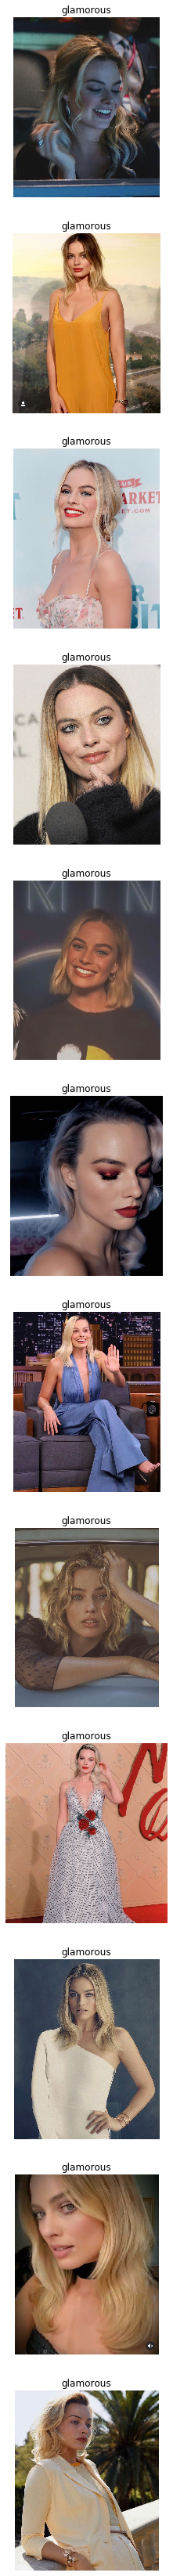

In [14]:
# load images and put labels in the title, plot here for assessment 

# load modules
from skimage.io import imread_collection
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#%matplotlib inline

#your path 
images_dir = 'official/*.png'

#creating a collection with the available images
images = imread_collection(images_dir)

fig = plt.figure(figsize=(60,60))
for image in range(len(images)): 
    a = fig.add_subplot(len(images), 1, image+1)
    imgplot = plt.imshow(images[image])
    a.set_title(f'{y_pred_lbnm[image]}')
    plt.axis('off')


## Run Statistics

In [15]:
import pandas as pd
df = pd.Series(y_pred_lbnm).value_counts() 
print(df) 

glamorous    12
dtype: int64


In [16]:
df = pd.Series(y_pred_lbnm).value_counts()       
print(round(df / len(y_pred_lbnm)*100, 2) )

glamorous    100.0
dtype: float64
